K-Nearest Neighbours

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/train_data.csv')

In [ ]:
data.shape

(7000, 10)

In [ ]:
look_up_loan_id=dict(zip(data.loan_id.unique(), data.proof_submitted.unique()))

In [ ]:
look_up_loan_id

{1: 'Aadhar', 2: 'VoterID', 3: 'Driving', 4: 'PAN', 5: 'Passport'}

In [ ]:
x=data[['no_of_loans', 'no_of_curr_loans','last_delinq_none']]
y=data['education']

In [ ]:
print(x.shape)
print(y.shape)

(7000, 3)
(7000,)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x, y, random_state=0)

In [ ]:
y_train.fillna(0, inplace = True)
y_test.fillna(0, inplace = True)


In [ ]:
X_train.shape

(5250, 3)

In [ ]:
y_train.shape

(5250,)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict=knn.predict(X_test)
y_correct=np.array(y_test)
print(np.concatenate((y_predict.reshape(len(y_predict), 1), y_correct.reshape(len(y_correct),1)),axis=1))

[[2. 2.]
 [2. 1.]
 [1. 1.]
 ...
 [2. 1.]
 [1. 2.]
 [2. 1.]]


In [ ]:
#Calculation the Score
knn.score(X_test, y_test)

0.52

In [ ]:
knn.score(X_train, y_train)

0.5276190476190477

In [ ]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test, y_predict)
print(conf_mat)

[[  0  12  54]
 [  0 179 516]
 [  0 258 731]]


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.4142857142857143

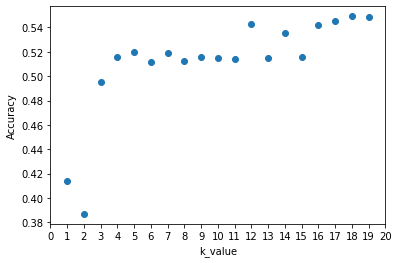

In [ ]:
k_range = range(1,20)
scores = []
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors = k)
 knn.fit(X_train, y_train)
 scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,21));
